In [2]:
import numpy as np
from scipy.stats import norm, entropy
import matplotlib.pyplot as plt

In [7]:
# Parameters for the first ans second normal distribution
mu1, sigma1, mu2, sigma2 = 0, 1, 1.5, 2

# Create the PDFs
x = np.linspace(-5, 5, 1000)
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)

# Ensure that both PDFs are non-negative and sum to 1 (optional, but good practice)
pdf1 = np.clip(pdf1, a_min=1e-10, a_max=None)
pdf2 = np.clip(pdf2, a_min=1e-10, a_max=None)

# Normalize the PDFs if necessary
pdf1 /= np.sum(pdf1) * (x[1] - x[0])
pdf2 /= np.sum(pdf2) * (x[1] - x[0])

# avg of two distributions
pdfavg = (pdf1 + pdf2)/2

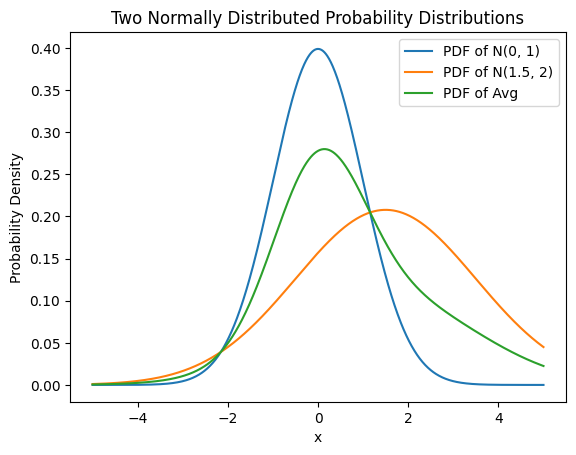

In [8]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the PDFs
ax.plot(x, pdf1, label=f'PDF of N({mu1}, {sigma1})')
ax.plot(x, pdf2, label=f'PDF of N({mu2}, {sigma2})')
ax.plot(x, pdfavg, label=f'PDF of Avg')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Two Normally Distributed Probability Distributions')
ax.legend()

# Show the plot
plt.show()

In [9]:
# KL Divergences
kl_p_q = entropy(pdf1, pdf2)             # D_KL(p || q)
kl_q_p = entropy(pdf2, pdf1)             # D_KL(q || p)
kl_p_m = entropy(pdf1, pdfavg)           # D_KL(p || m)
kl_q_m = entropy(pdf2, pdfavg)           # D_KL(q || m)

# JS Divergence
js_div = 0.5 * kl_p_m + 0.5 * kl_q_m

print(f"D_KL(p || q)  = {kl_p_q:.4f}")
print(f"D_KL(q || p)  = {kl_q_p:.4f}")
print(f"D_JS(p || q)  = {js_div:.4f}")

D_KL(p || q)  = 0.5581
D_KL(q || p)  = 1.4653
D_JS(p || q)  = 0.1583


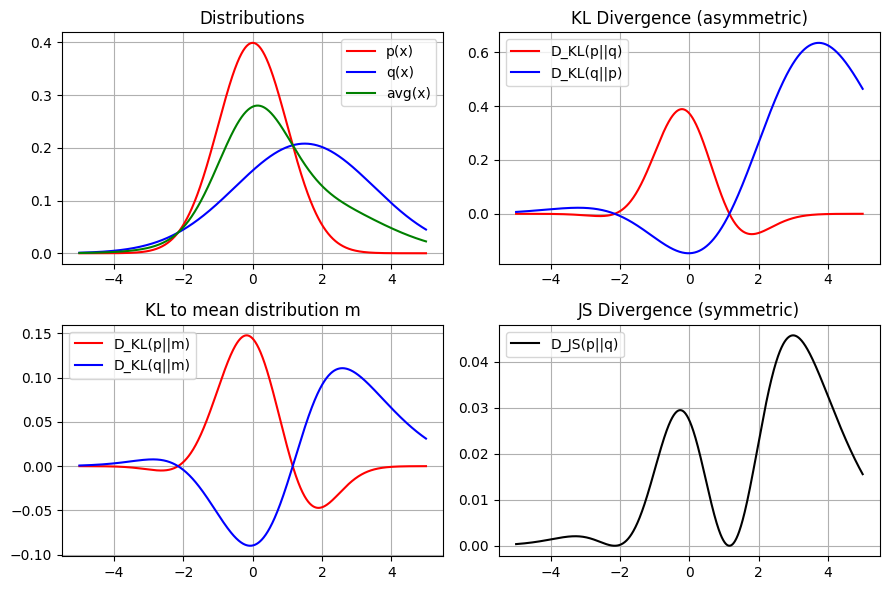

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the two Gaussians
mu1, sigma1, mu2, sigma2 = 0, 1, 1.5, 2

# X-axis for evaluation
x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0]

# Compute the PDFs
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)

# Clip small values to avoid log(0) and normalize
pdf1 = np.clip(pdf1, 1e-10, None)
pdf2 = np.clip(pdf2, 1e-10, None)
pdf1 /= np.sum(pdf1) * dx
pdf2 /= np.sum(pdf2) * dx
pdfavg = (pdf1 + pdf2) / 2

# Compute pointwise KL divergences
kl_p_q = pdf1 * np.log(pdf1 / pdf2)
kl_q_p = pdf2 * np.log(pdf2 / pdf1)
kl_p_m = pdf1 * np.log(pdf1 / pdfavg)
kl_q_m = pdf2 * np.log(pdf2 / pdfavg)
js_div = 0.5 * kl_p_m + 0.5 * kl_q_m

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Distributions
axs[0, 0].plot(x, pdf1, label='p(x)', color='red')
axs[0, 0].plot(x, pdf2, label='q(x)', color='blue')
axs[0, 0].plot(x, pdfavg, label='avg(x)', color='green')
axs[0, 0].set_title('Distributions')
axs[0, 0].legend()
axs[0, 0].grid(True)

# KL Divergence (asymmetric)
axs[0, 1].plot(x, kl_p_q, label='D_KL(p||q)', color='red')
axs[0, 1].plot(x, kl_q_p, label='D_KL(q||p)', color='blue')
axs[0, 1].set_title('KL Divergence (asymmetric)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# KL to mean distribution
axs[1, 0].plot(x, kl_p_m, label='D_KL(p||m)', color='red')
axs[1, 0].plot(x, kl_q_m, label='D_KL(q||m)', color='blue')
axs[1, 0].set_title('KL to mean distribution m')
axs[1, 0].legend()
axs[1, 0].grid(True)

# JS Divergence (symmetric)
axs[1, 1].plot(x, js_div, label='D_JS(p||q)', color='black')
axs[1, 1].set_title('JS Divergence (symmetric)')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
